In [7]:
from dateutil.parser import parse 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import cufflinks as cf
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Import as Dataframe
df = pd.read_csv('../data/ARdata.csv', parse_dates=['date'])
df.head()
df['date']

0     1991-07-01
1     1991-08-01
2     1991-09-01
3     1991-10-01
4     1991-11-01
         ...    
199   2008-02-01
200   2008-03-01
201   2008-04-01
202   2008-05-01
203   2008-06-01
Name: date, Length: 204, dtype: datetime64[ns]

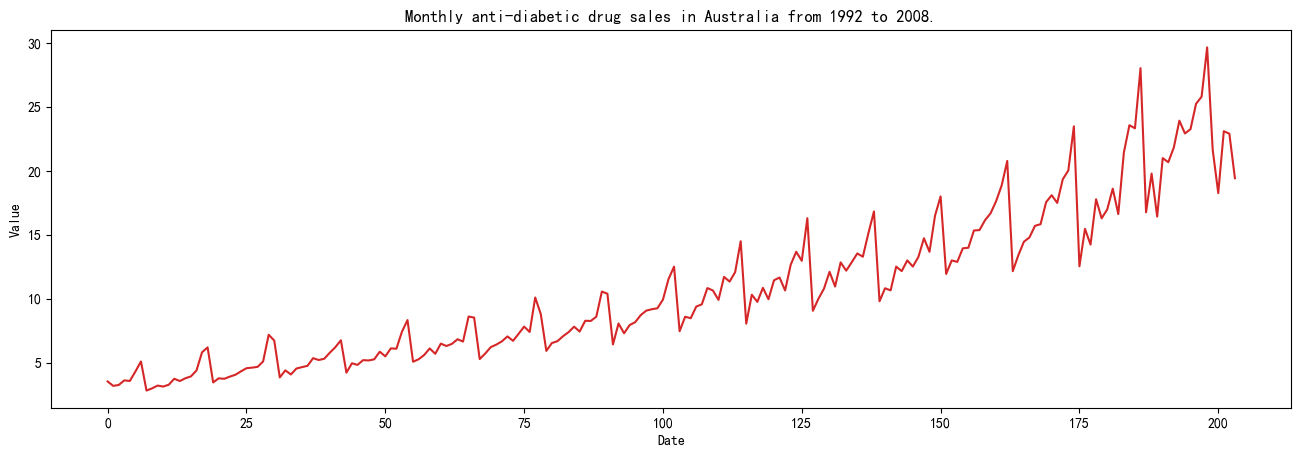

In [8]:
import matplotlib.pyplot as plt

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')    

In [9]:
df=pd.Series(df.value)
df.iplot()

In [16]:
w=0.1

df_p=df.copy()
for i in range(1,len(df)):
    df_p[i]=(1-w)*df_p[i-1]+w*df[i]
df_p.iplot()

In [20]:
n=9

df_p=df.copy()
for i in range(n,len(df)):
    sum=df[i-n-1:i-1].mean()
    df_p[i]=sum
df_p.iplot()

$$  \begin{array}{l}l_{t}=\beta_{0}+\beta_{1}l_{t-1}+\phi_{1} \varepsilon_{t-1}+\varepsilon_{t} \\ \hat{l}_{t}=\beta_{0}+\beta_{1} l_{t-1}+\phi_{1} \varepsilon_{t-1}\end{array}  $$

In [ ]:

months=20
import plotly.graph_objects as go
numlist=[7.292381842763499, 11.268469370869623, 7.988919686731839, 10.024457388837568, 10.659652120738091, 7.883991400733892, 11.782130024753913, 8.50468658608414, 9.528043810383563, 9.631826306559587, 10.415901925086592, 10.36022017613425, 7.954482946778904, 10.1566129301558, 13.338585301823642, 8.54308702819799, 10.15057815236234, 7.70998204086492, 10.923159510105478, 10.14340619790174]
# np.random.seed=123

fig=go.Figure()
fig.add_trace(go.Scatter(x=list(range(months)),y=numlist,name='origin')) 
fig.update_layout(xaxis_title='month',yaxis_title='number')

In [ ]:
mu=10
beta1=0.4
phi1=0.6

prd_list=[mu]
err=numlist[0]-mu
for i in range(1,months):
    num=5+beta1*prd_list[-1]+phi1*err
    err=numlist[i]-num
    prd_list.append(num)
fig.add_trace(go.Scatter(x=list(range(months)),y=prd_list,name="predict")) 

In [ ]:
# 不读取第一行，用空格分隔sep=’\t’
# df=pd.read_csv("data/ftsdata/m-ibm3dx2608.txt",delim_whitespace=True,names=['date', 'ibmrtn', 'vwrtn', 'ewrtn', 'sprtn'])#读取txt有bug
a=np.loadtxt("data/ftsdata/m-ibm3dx2608.txt",skiprows = 1)
df=pd.DataFrame(a)
df.columns=['date', 'ibmrtn', 'vwrtn', 'ewrtn', 'sprtn']
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
fig=go.Figure()

fig.add_trace(go.Scatter(x=df["date"],y=df["vwrtn"]))
fig.update_layout(xaxis_title='Time',yaxis_title='vm')

In [ ]:
df["vwrtn"].describe()

count    996.000000
mean       0.008904
std        0.054324
min       -0.290070
25%       -0.018318
50%        0.012625
75%        0.039624
max        0.383683
Name: vwrtn, dtype: float64

信息准则是统计建模中常用的模型比较工具, 其基本思想是模型拟合数据的拟合优度与模型简单化的折衰。

AIC 准则 (Akaike's Information Criterion):

$
\mathrm{AIC}=-\frac{2}{T} \ln (\text { 似然函数值 })+\frac{2}{T}(\text { 参数个数 })
$

其中似然函数值是在参数最大似然估计处的似然函数值。当模型为高斯 $ \mathrm{AR}(\mathrm{p}) $, 即 $ \left\{\epsilon_{t}\right\} $ 是独立同 $ \mathrm{N}\left(0, \sigma^{2}\right) $ 序列时的 $ \operatorname{AR}(p) $ 模型时, AIC 公式为

$
\operatorname{AIC}(k)=\ln \tilde{\sigma}_{k}^{2}+\frac{2 k}{T}
$

其中 $ k $ 是模型的阶, $ \tilde{\sigma}_{k}^{2} $ 是阶为 $ k $ 的条件下 $ \varepsilon_{t} $ 的方差的最大似然估计。

 $ \ln \tilde{\sigma}_{k}^{2} $ 代表了模型对数据的拟合优劣, 此值越 大拟合越差; $ \frac{2 k}{T} $ 是对模型复杂程度的惩罚, 此值越大, 模型越复杂, 稳定性越差, 对末来的情况的适应性也越差。在 某个范围内取 $ k $ 使得 $ \mathrm{AIC}(k) $ 最小，就达成了拟合优度与模型简单程度的折衷。

另一个常用的信息准则是 BIC 准则 (Bayesian Information Criterion), 高斯 AR 模型为:

$
\mathrm{BIC}(k)=\ln \tilde{\sigma}_{k}^{2}+\frac{k \ln T}{T}
$

可以取 $ k=0,1, \ldots, P_{0} $ 计算 $ \mathrm{AIC} $ 或 $ \mathrm{BIC} $, 取最小值点的 $ k 。 P_{0} $ 可取为 $ 10 \log _{10} T $ 。

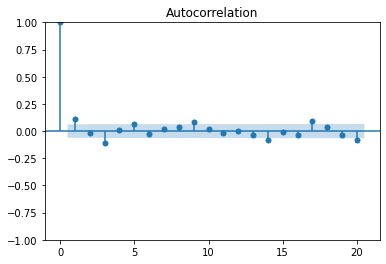

In [ ]:
T=len(df)
import matplotlib
matplotlib.rc("font",family='DejaVu Sans')
P0=round(10*np.log10(T))
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_plot = plot_acf(df["vwrtn"], lags=20)
    

c:\Users\19234\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



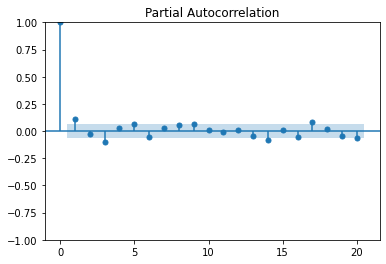

In [ ]:
pacf_plot = plot_pacf(df["vwrtn"], lags=20)

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
import statsmodels.tsa.stattools as st
order_analyze = st.arma_order_select_ic(df["vwrtn"][:50], max_ar=10, max_ma=10, ic=['aic', 'bic'])
order_analyze

c:\Users\19234\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\19234\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\19234\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\19234\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\19234\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\U

{'aic':             0           1           2           3           4           5   \
 0  -145.953112 -146.364943 -144.836238 -147.027928 -145.891572 -144.153688   
 1  -146.313399 -144.437506 -144.886396 -145.570759 -143.574921 -145.278325   
 2  -144.769870 -145.983364 -145.854481 -143.940168 -145.895893 -144.118573   
 3  -147.386332 -145.461651 -143.499436 -141.986666 -143.136991 -142.920309   
 4  -145.484398 -143.629918 -141.784030 -138.627913 -140.021469 -141.590804   
 5  -143.622625 -141.719598 -139.695114 -139.156289 -143.613063 -137.716318   
 6  -141.760214 -139.846096 -138.823508 -139.527400 -139.296174 -139.272225   
 7  -140.606452 -139.668709 -138.230956 -137.214009 -135.105303 -136.199926   
 8  -141.743565 -139.864827 -137.862966 -135.943475 -138.648138 -135.880953   
 9  -139.913505 -137.918034 -135.950873 -133.981182 -137.599541 -130.730557   
 10 -137.928528 -135.936393 -133.933527 -131.989416 -134.829781 -128.792672   
 
             6           7           8     

In [ ]:
# arma_model = ARMA(return_df, (1,3))
# fitted = arma_model.fit()

model_fit = AutoReg(df["vwrtn"][:80], lags=3).fit()
model_fit.predict(80,100)

80     0.090199
81    -0.117390
82    -0.171919
83    -0.076352
84     0.030208
85     0.075497
86     0.048058
87    -0.001243
88    -0.030467
89    -0.026250
90    -0.005457
91     0.010967
92     0.013049
93     0.005175
94    -0.003199
95    -0.005950
96    -0.003419
97     0.000514
98     0.002517
99     0.001958
100    0.000254
dtype: float64

In [ ]:
fig=go.Figure()
nmin=0
nmax=80

num=nmax-nmin
fig.add_trace(go.Scatter(x=list(range(num)),y=df["vwrtn"][nmin:nmax]))
fig.add_trace(go.Scatter(x=list(range(num)),y=model_fit.predict(nmin,nmax)))

In [ ]:
return_df=df["vwrtn"].diff()
return_df[0]=0
fig=go.Figure()
nmin=50
nmax=150
model_fit = AutoReg(return_df[:100], lags=6).fit()
num=nmax-nmin
fig.add_trace(go.Scatter(x=list(range(num)),y=return_df[nmin:nmax],name="origin"))
fig.add_trace(go.Scatter(x=list(range(num)),y=model_fit.predict(nmin,nmax),name="predict"))

对平稳 $ \mathrm{AR}(p) $ 模型, 当超前步数 $ \ell \rightarrow+\infty $ 时, $ \hat{x}_{h}(\ell) \rightarrow \mu $ 。这种性质称为均值回转 (mean reversion)。
对 $ \mathrm{AR}(1) $ 模型的零均值平稳解 $ \left\{x_{t}\right\} $, 可以看出
$
\hat{x}_{h}(\ell)=\phi_{1}^{\ell} x_{h}
$
这也是与极限 0 之间的差距, 而 $ \left|\phi_{1}\right|^{\ell} $ 则代表了趋向于极限的速度, 当 $ \left|\phi_{1}\right|^{\ell}=\frac{1}{2} $ 时趋向于极限 0 就可以认为极限过 程已经到了一半, 这个 $ \ell=\ln (0.5) / \ln \left|\phi_{1}\right| $ 称为均值回转的半衰期。半衰期越短, 多步预报的作用越差。